In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import loompy
from ipywidgets import IntProgress

In [2]:
# import rpy2
# from rpy2.robjects import r
# #import rpy2.rinterface_lib.callbacks
# # import logging
# import anndata2ri
# # from rpy2.robjects import pandas2ri
# # import anndata2ri

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
#results_file = './write/paul15.h5ad'
sc.settings.set_figure_params(dpi=180, frameon=False, figsize=(8, 8))  # low dpi (dots per inch) yields small inline figures

scanpy==1.4.5 anndata==0.6.22.post1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1+4.bed07760 louvain==0.6.1


In [4]:
epi = sc.read('../data/epi_final.h5ad')

In [5]:
epi_copy = epi.copy()


In [6]:
epi_copy.obs

,batch,n_genes,percent_mito,n_counts,leiden_r1.0,louvain_r1.0,leiden_adata_clusters,louvain_epi_r1.0,leiden_epi_r1.0,leiden_epi_clusters
index,,,,,,,,,,
AAACCTGCATGTCGAT-WT,WT,1819,0.030933,5934.871582,0,0,Epithelial cells,7,1,Type II Pneumocytes
AAACCTGTCACCTCGT-WT,WT,1758,0.042098,5314.225586,0,0,Epithelial cells,0,0,Type II Pneumocytes
AAACCTGTCCACGCAG-WT,WT,2620,0.036597,5943.985840,2,2,Epithelial cells,8,5,Foxj1+ Ciliated Cells
AAACCTGTCCCAAGTA-WT,WT,1771,0.025849,5713.408203,0,0,Epithelial cells,7,1,Type II Pneumocytes
AAACCTGTCTCTAGGA-WT,WT,1826,0.042839,6809.791016,0,0,Epithelial cells,0,1,Type II Pneumocytes
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTACGCGA-Repdose,Repdose,2995,0.053804,19143.015625,7,9,Epithelial cells,6,6,Scgb1a1/Scgb3a2
TTTGTCACACAGGAGT-Repdose,Repdose,2179,0.032025,5995.936523,14,14,Epithelial cells,10,9,Krt5/Krt17/Scgb1a1/Hif1a
TTTGTCACACCATCCT-Repdose,Repdose,2499,0.064488,6121.461426,3,8,Epithelial cells,2,4,Foxj1+ Ciliated Cells


In [7]:
epi_copy.var[epi.var.highly_variable==True].shape

(3008, 7)

In [8]:
sc.tl.pca(epi_copy, svd_solver='arpack')

computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:01)


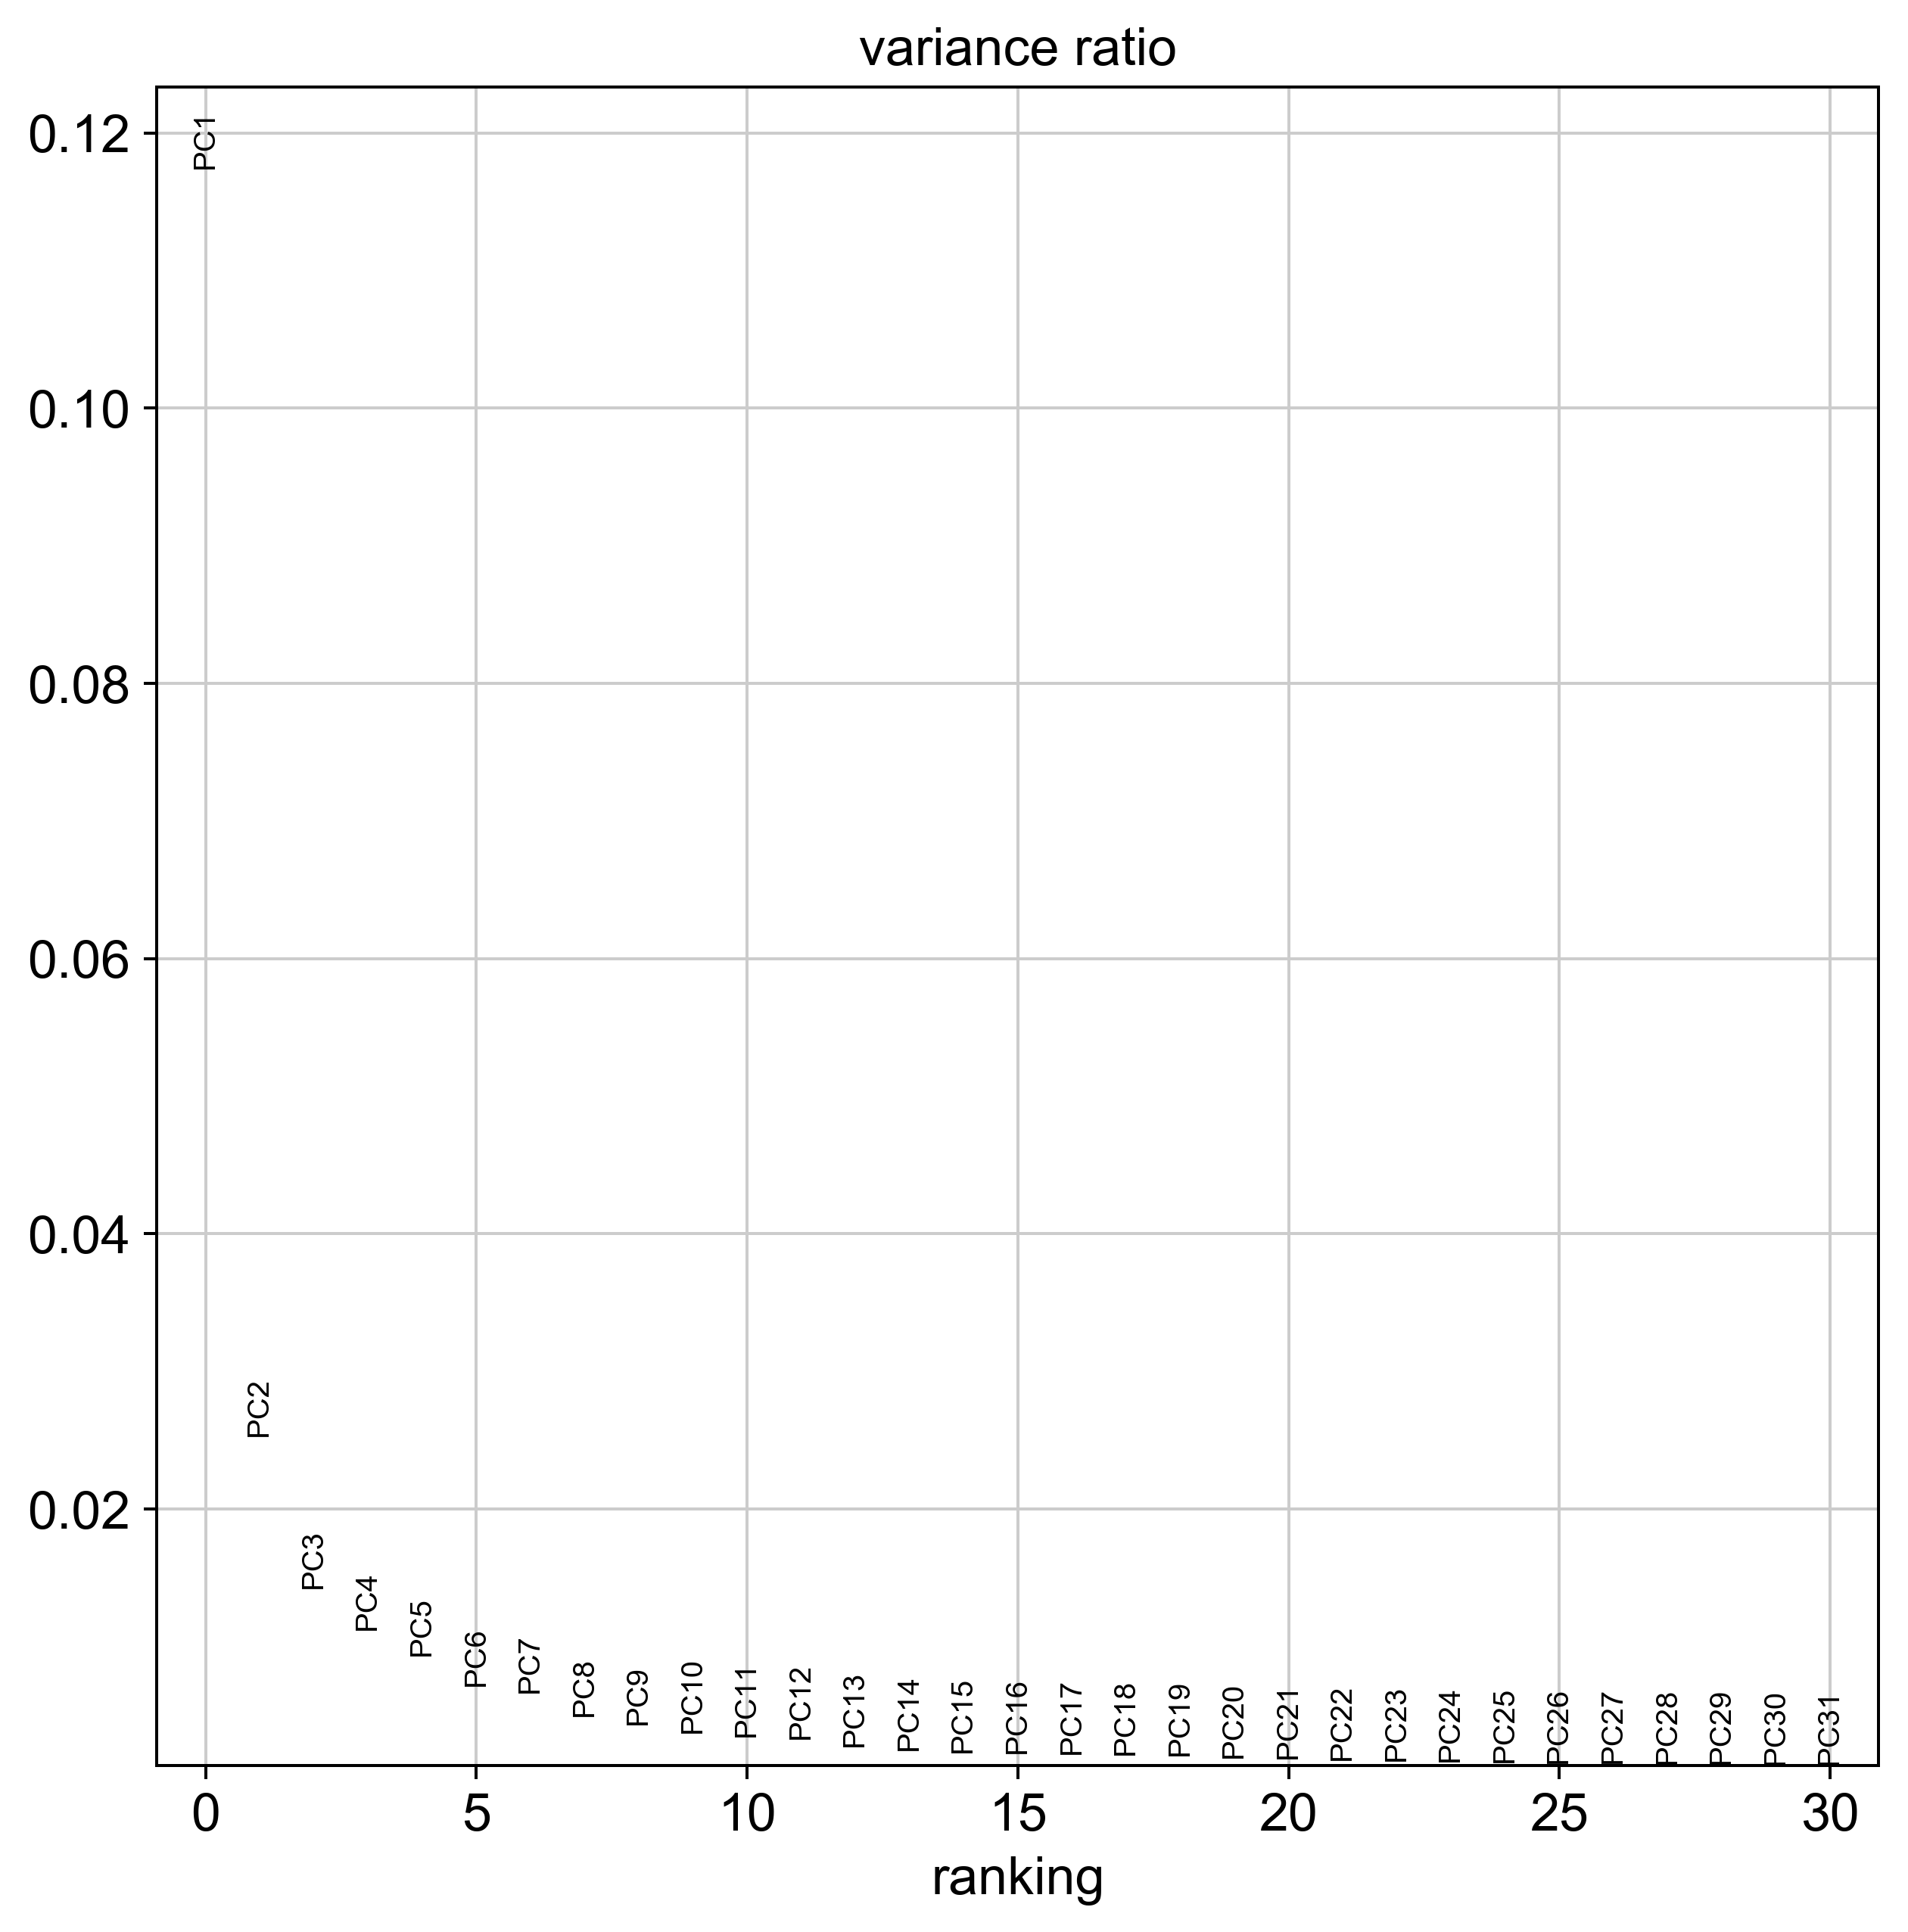

In [9]:
sc.pl.pca_variance_ratio(epi_copy)

In [10]:
epi_copy.obsm['X_pca'] = epi_copy.obsm['X_pca'][:,0:11]

In [11]:
sc.pp.neighbors(epi_copy)
sc.tl.diffmap(epi_copy)

computing neighbors
    using 'X_pca' with n_pcs = 11
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9984159  0.9927188  0.98660344 0.9837717  0.98062176
     0.9777494  0.9741395  0.97175664 0.96614873 0.9656086  0.9622628
     0.953163   0.952382   0.9501477 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


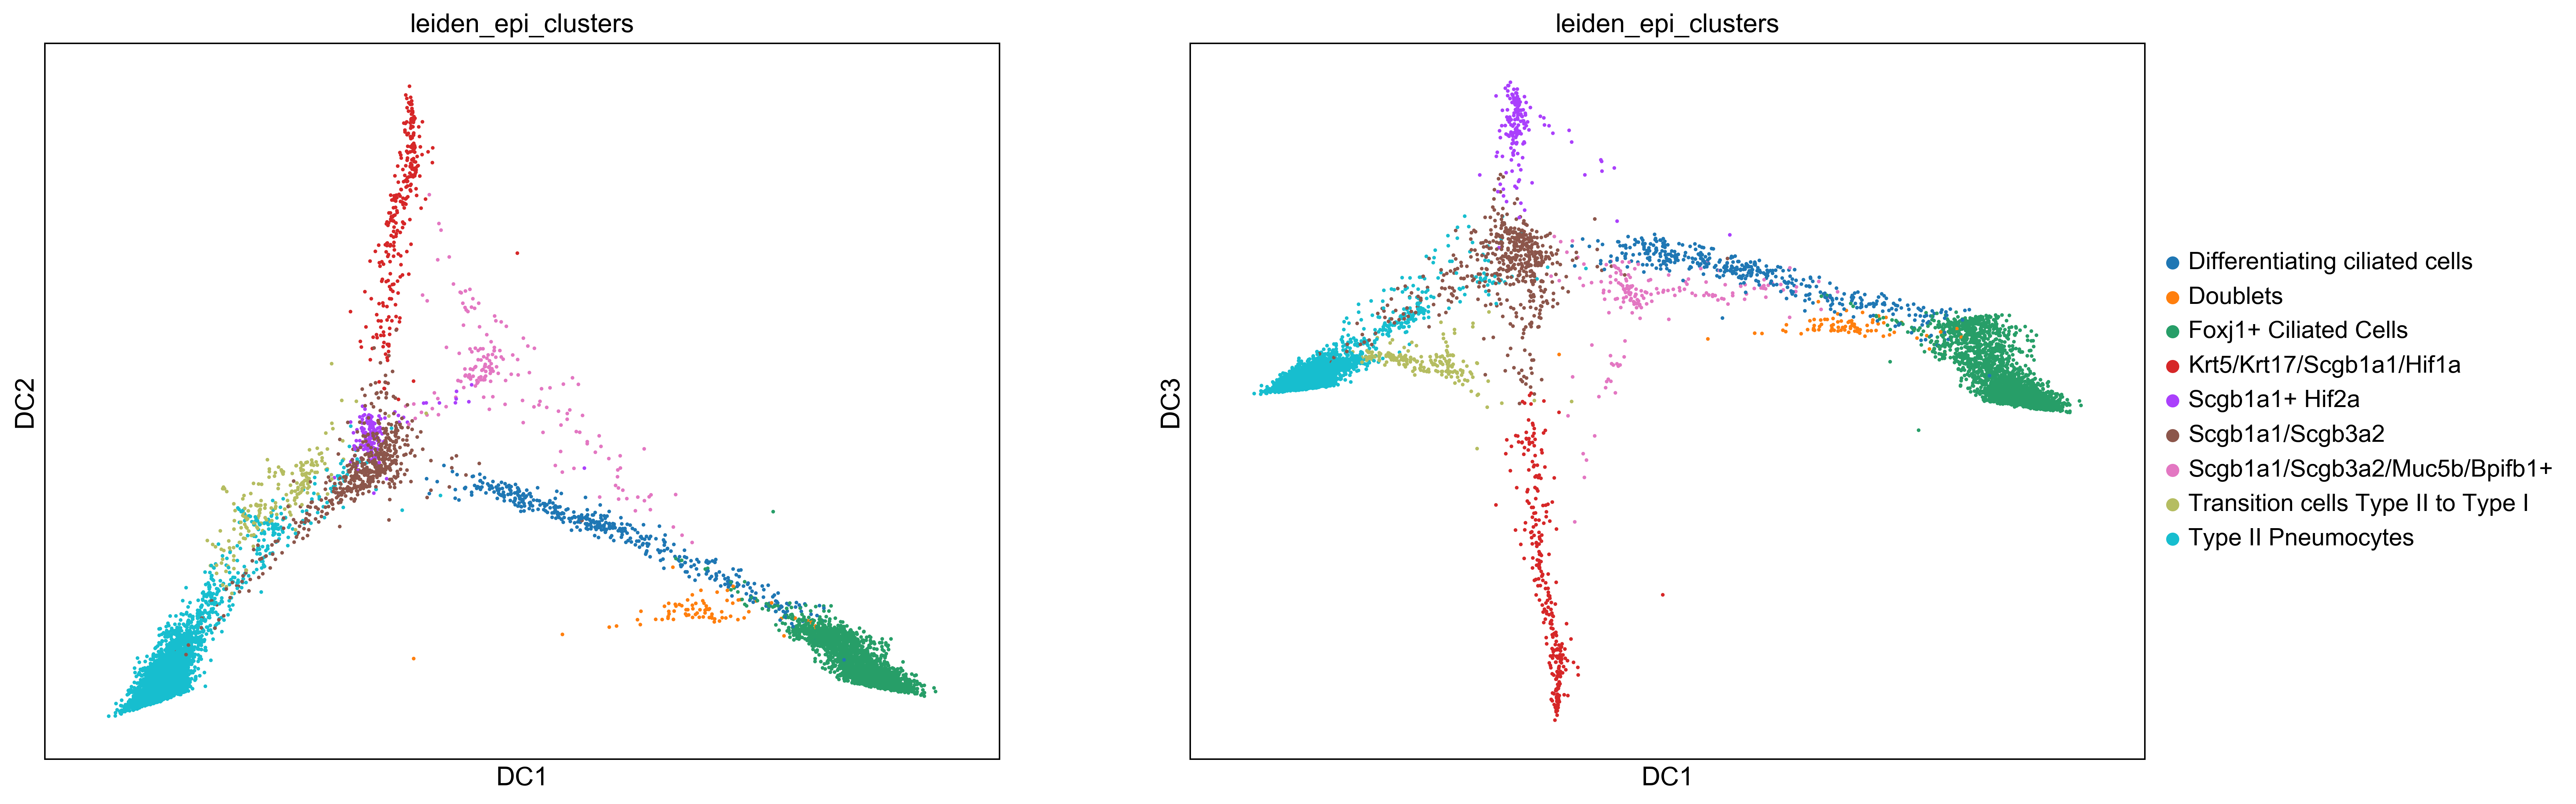

In [12]:
fig, ax =plt.subplots(ncols=2, figsize=(20,7))
sc.pl.diffmap(epi_copy, components='1,2', color='leiden_epi_clusters',frameon = True, legend_loc='', ax=ax[0], show=False)
sc.pl.diffmap(epi_copy, components='1,3', color='leiden_epi_clusters', frameon = True,legend_loc="right margin", ax=ax[1], show= False)
fig.savefig("./figures/diffusion_pseudotime_epi.pdf", dpi=300,bbox_inches='tight')

In [13]:
#Find the krt5 cell with the highest DC3 value to act as root for the diffusion pseudotime and compute DPT
krt5_epi = np.isin(epi_copy.obs['leiden_epi_clusters'], 'Type II Pneumocytes')
max_krt5_id = np.argmin(epi_copy.obsm['X_diffmap'][krt5_epi,2])
root_id = np.arange(len(krt5_epi))[krt5_epi][max_krt5_id]
epi_copy.uns['iroot'] = root_id

#Compute dpt
sc.tl.dpt(epi_copy)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)


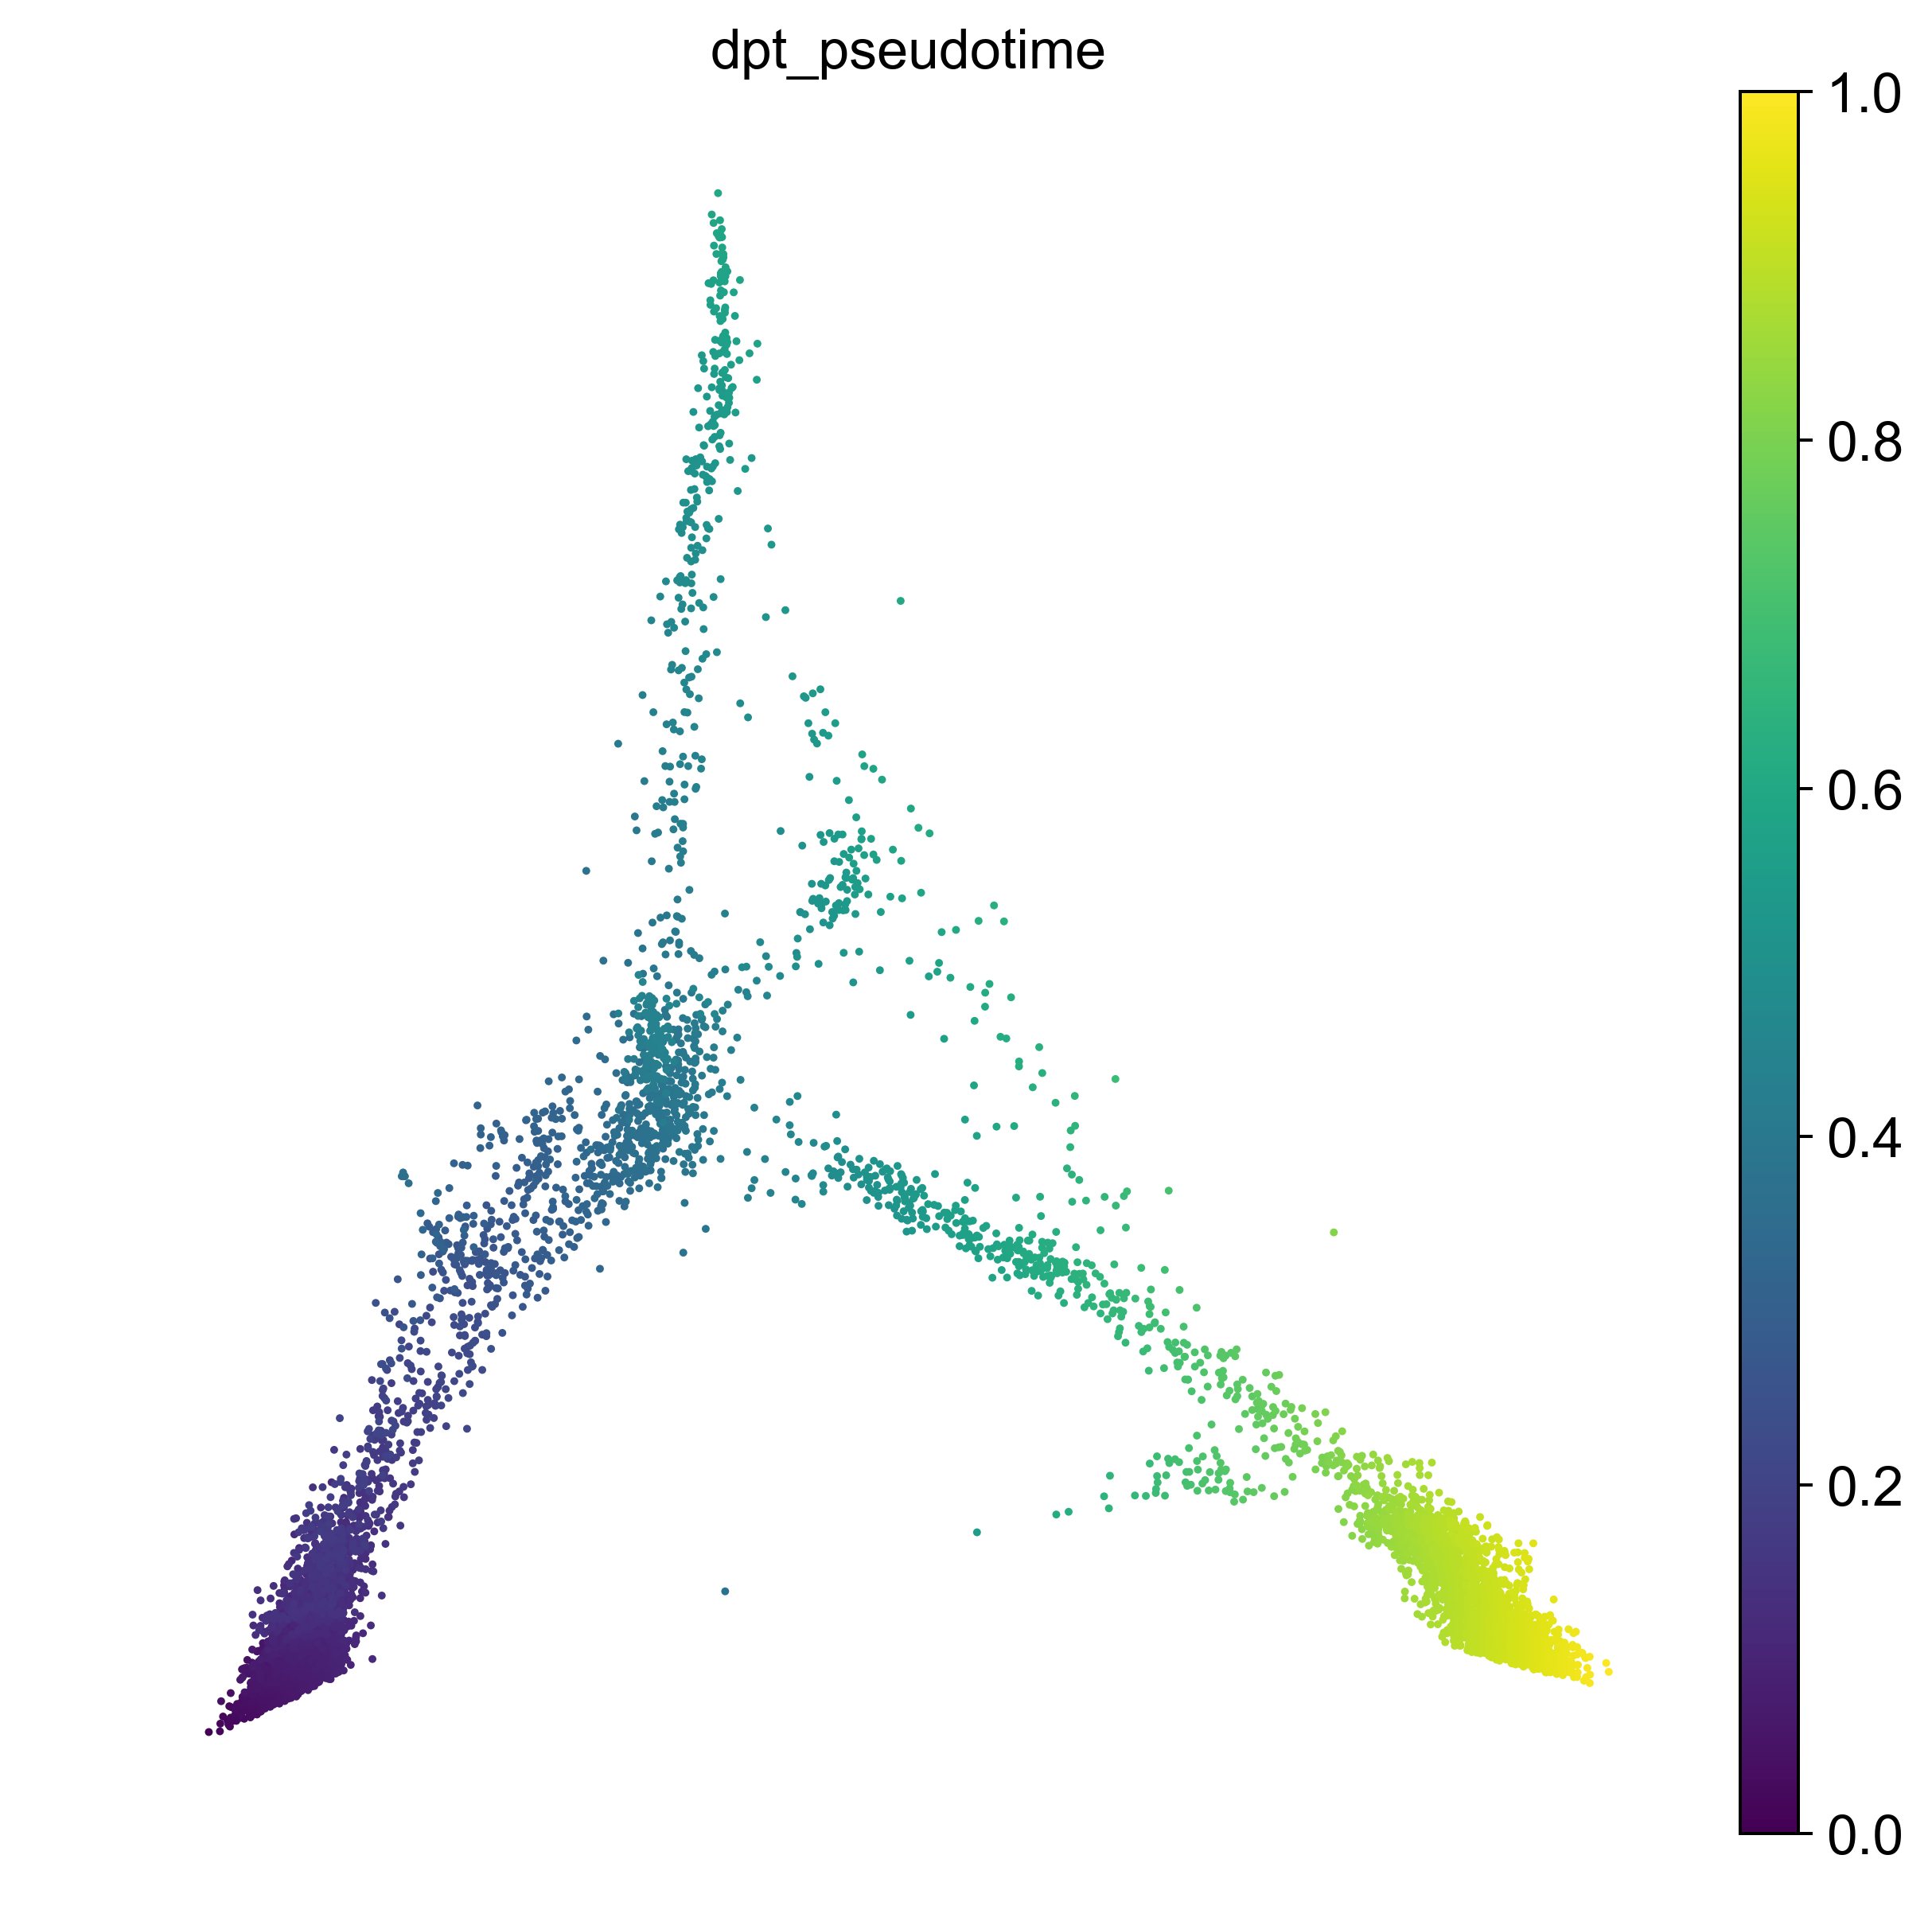

In [14]:
#Visualize pseudotime over differentiation
sc.pl.diffmap(epi_copy, components='1,2', color='dpt_pseudotime')
fig.savefig("./figures/diffusion_pseudotime_epikrt5.pdf", dpi=300,bbox_inches='tight')


In [ ]:
sc.pp.neighbors(epi_copy, n_neighbors=15, use_rep='X_diffmap')


In [ ]:
#sc.pl.umap(epi, color=['leiden_epi_clusters'], title='Epithelial clusters', frameon = True, legend_fontsize=8, s= 30, alpha = 1,legend_loc='right margin')

In [ ]:
sc.tl.draw_graph(epi_copy)

In [ ]:
sc.pl.draw_graph(epi_copy, color='leiden_epi_clusters', legend_loc='right margin')

In [ ]:
sc.tl.leiden(epi_copy, resolution=1.0)

In [ ]:
sc.tl.paga(epi_copy, groups='leiden')

In [ ]:
sc.pl.paga(epi_copy, color=['Krt5', 'Sftpc'], node_size_scale= 5);

In [ ]:
sc.pl.paga(epi_copy, color=['Sftpc'], node_size_scale= 1);

In [ ]:
epi_copy.obs['leiden'].cat.categories

In [ ]:
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([0,1,3,7,10]), 'traj_epi_clusters']=str('Type II Pneumocytes')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([2,4,5,14]), 'traj_epi_clusters']=str('Foxj1+ Ciliated Cells')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([9]), 'traj_epi_clusters']=str('Krt5/Krt17/Scgb1a1/Hif1a')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([6]), 'traj_epi_clusters']=str('Scgb1a1/Scgb3a2')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([11]), 'traj_epi_clusters']=str('Transition cells Type II to Type I')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([15]), 'traj_epi_clusters']=str('Doublets')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([13]), 'traj_epi_clusters']=str('Scgb1a1/Scgb3a2/Muc5b/Bpifb1+')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([12]), 'traj_epi_clusters']=str('Scgb1a1+ Hif2a')
epi.obs.loc[epi.obs['leiden_epi_r1.0'].isin([8]), 'traj_epi_clusters']=str('Differentiating ciliated cells')